# **Importing Packages**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plot

# **Importing Data**

In [2]:
data=pd.read_csv('/content/train.csv')

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **EDA**

Donut Plot

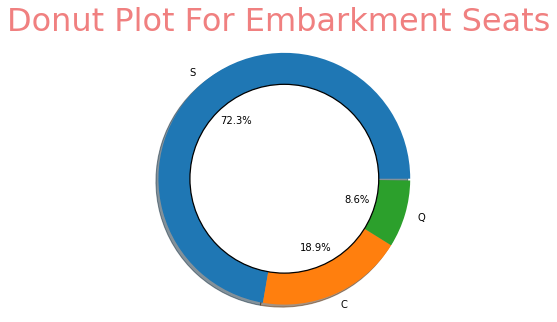

In [67]:
are=data['Embarked'].values
s=list(are).count('S')/len(are)
c=list(are).count('C')/len(are)
q=list(are).count('Q')/len(are)
size=[s,c,q]
color=['yellowgreen', 'gold', 'lightskyblue']
labels=['S','C','Q']
explode=(0,0,0)
plt.figure(figsize=(5,5))
plt.suptitle('Donut Plot For Embarkment Seats', fontsize=32,color='lightcoral')
plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()  

Donut plot with the deaths of the people 

In [55]:
s1=data[data['Embarked']=='S']
s1=s1[s1['Survived']==1]
s1=len(s1.values)/891
c1=data[data['Embarked']=='C']
c1=c1[c1['Survived']==1]
c1=len(c1.values)/891
q1=data[data['Embarked']=='Q']
q1=q1[q1['Survived']==1]
q1=len(q1.values)/891



In [56]:
s0=data[data['Embarked']=='S']
s0=s0[s0['Survived']==0]
s0=len(s0.values)/891
c0=data[data['Embarked']=='C']
c0=c0[c0['Survived']==0]
c0=len(c0.values)/891
q0=data[data['Embarked']=='Q']
q0=q0[q0['Survived']==0]
q0=len(q0.values)/891

group_names=['S', 'C', 'Q']
group_size=[s,c,q]
subgroup_names=['S lived','S Died','C lived','C died','Q lived' ,'Q died']
subgroup_size=[s1,s0,c1,c0,q1,q0]

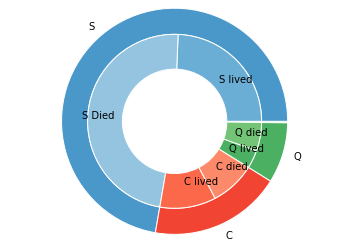

In [68]:

group_names=['S', 'C', 'Q']
group_size=[s,c,q]
subgroup_names=['S lived','S Died','C lived','C died','Q lived' ,'Q died']
subgroup_size=[s1,s0,c1,c0,q1,q0]
 

 
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4),  b(0.5), b(0.4), c(0.6), c(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()



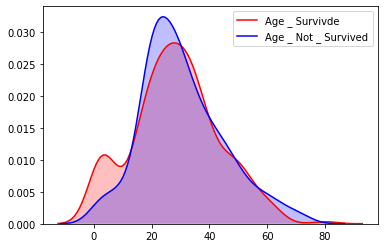

In [79]:
p1=sns.kdeplot(data[data['Survived']==1]['Age'], shade=True, color="r",label='Age _ Survivde')
p1=sns.kdeplot(data[data['Survived']==0]['Age'], shade=True, color="b",label="Age _ Not _ Survived")


This graph in particular shows that the number of people with the fare of the ticket in between 0-100 are the ones with the highest deaths in the titanic tragedy and we also see that people with the Fare rate of 300-500 are the ones with the definate survival in the tragedy so we can see that the fare played an important role in the decision of surival for those people .

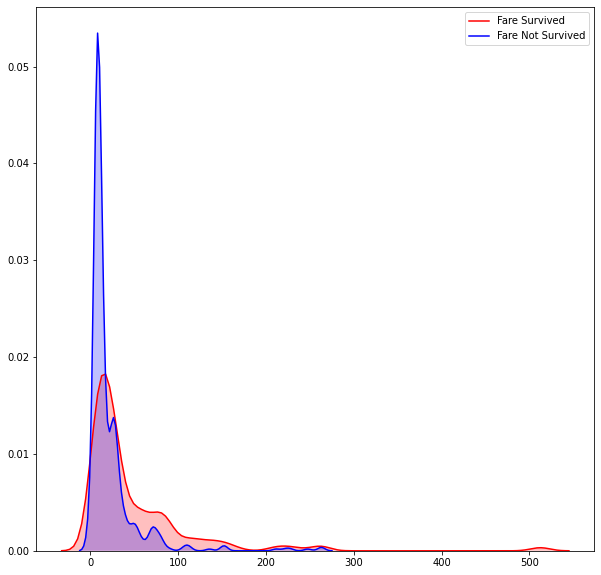

In [82]:
plt.figure(figsize=(10,10))
p2=sns.kdeplot(data[data['Survived']==1]['Fare'], shade=True, color="r",label="Fare Survived")
p2=sns.kdeplot(data[data['Survived']==0]['Fare'], shade=True, color="b",label="Fare Not Survived")

# **Feature Selection**

In [4]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [5]:
model=LogisticRegression(solver='lbfgs')

In [6]:
p=RFE(estimator=model,n_features_to_select=6)
